In [1]:
%matplotlib widget

In [2]:
import pyFAI
from pyFAI.test.utilstest import UtilsTest
import fabio
from pyFAI.gui import jupyter
from pyFAI import units
from pyFAI.method_registry import Method,IntegrationMethod

<Axes: >

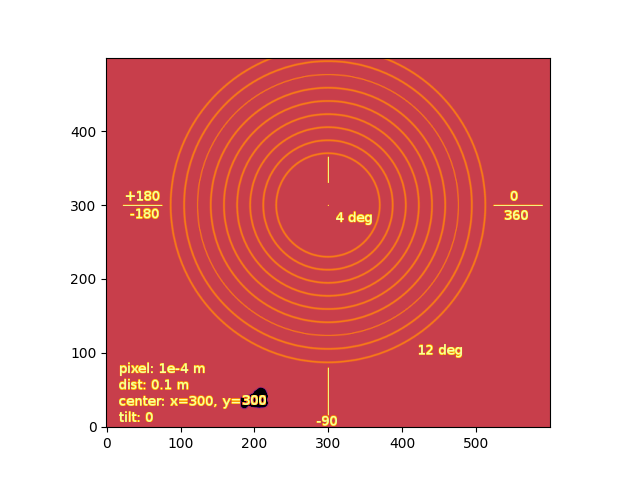

In [3]:
img = fabio.open(UtilsTest.getimage("moke.tif")).data
jupyter.display(img)

In [12]:
det = pyFAI.detector_factory("Detector", {"pixel1":1e-4,"pixel2":1e-4})
ai = pyFAI.load({"detector": det, "wavelength": 1e-10})
ai.setFit2D(1000, 300, 300)
ai

Detector Detector	 Spline= None	 PixelSize= 1.000e-04, 1.000e-04 m
Wavelength= 1.000000e-10 m
SampleDetDist= 1.000000e+00 m	PONI= 3.000000e-02, 3.000000e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1000.000 mm	Center: x=300.000, y=300.000 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.000Å

In [13]:
len(IntegrationMethod.select_method(dim=2))

54

In [14]:
for m in IntegrationMethod.select_method(dim=2):
    try:
        res = ai.integrate2d(img, 400,400, method=m, unit="qx_nm^-1")
    except:
        print(m, "broken")
    else:    
        print(m, res[1].max(), res[2].max())

IntegrationMethod(2d int, no split, histogram, python) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, no split, histogram, cython) 1.8788340432617532 179.45460825256927
calculate corners for qx_nm^-1
IntegrationMethod(2d int, bbox split, histogram, cython) 1.8819646262868988 179.55002642728456
calculate corner array for qx_nm^-1 (qx_nm^-1, chi_deg)
IntegrationMethod(2d int, full split, histogram, cython) 1.8819646069295608 179.35927938716083
calculate corner array for qx_nm^-1 (qx_nm^-1, chi_deg)


  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/home/jerome/.venv/p

IntegrationMethod(2d int, pseudo split, histogram, cython) 1.8819646069295608 179.35927938716083
IntegrationMethod(2d int, no split, CSR, cython) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSR, cython) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSR, python) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSR, python) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSC, cython) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSC, cython) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSC, python) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSC, python) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, bbox split, LUT, cython) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, LUT, cython) 1.8788340432617532 179.45460825256927
calculate corner array 

1 error generated.
/home/jerome/.venv/py311/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(
/home/jerome/.venv/py311/lib/python3.11/site-packages/pyopencl/cache.py:499: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  prg.build(options_bytes, devices)


IntegrationMethod(2d int, no split, histogram, OpenCL, Portable Computing Language / pthread-haswell-AMD EPYC 7262 8-Core Processor) 1.8788340477645398 179.45460781259825
IntegrationMethod(2d int, no split, histogram, OpenCL, Intel(R) OpenCL / AMD EPYC 7262 8-Core Processor) 1.8788340477645398 179.45460781259825
IntegrationMethod(2d int, no split, histogram, OpenCL, AMD Accelerated Parallel Processing / gfx900:xnack-) 1.8788340477645398 179.45460781259825
IntegrationMethod(2d int, bbox split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GTX 750 Ti) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GTX 750 Ti) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GT 1030) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GT 1030) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox

/home/jerome/.venv/py311/lib/python3.11/site-packages/pyopencl/cache.py:417: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  prg.build(options_bytes, [devices[i] for i in to_be_built_indices])


IntegrationMethod(2d int, bbox split, CSR, OpenCL, Intel(R) OpenCL / AMD EPYC 7262 8-Core Processor) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSR, OpenCL, Intel(R) OpenCL / AMD EPYC 7262 8-Core Processor) 1.8788340432617532 179.45460825256927
IntegrationMethod(2d int, bbox split, CSR, OpenCL, AMD Accelerated Parallel Processing / gfx900:xnack-) 1.8819646262868988 179.55002642728456
IntegrationMethod(2d int, no split, CSR, OpenCL, AMD Accelerated Parallel Processing / gfx900:xnack-) 1.8788340432617532 179.45460825256927
calculate corner array for qx_nm^-1 None
calculate corner array for qx_nm^-1 (qx_nm^-1, chi_deg)
IntegrationMethod(2d int, full split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GTX 750 Ti) 1.8819646069295608 179.35927938716083
calculate corner array for qx_nm^-1 None
calculate corner array for qx_nm^-1 (qx_nm^-1, chi_deg)
IntegrationMethod(2d int, full split, CSR, OpenCL, NVIDIA CUDA / NVIDIA GeForce GT 1030) 1.8819646069295608 179.359279

IntegrationMethod(2d int, full split, CSR, cython)
calculate corner array for qx_nm^-1 None
calculate corners for qx_nm^-1


  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/jerome/.venv/py311/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/home/jerome/.venv/p

<Axes: xlabel='Scattering vector along x $q_x$ ($nm^{-1}$)', ylabel='Scattering vector along x $q_y$ ($nm^{-1}$)'>

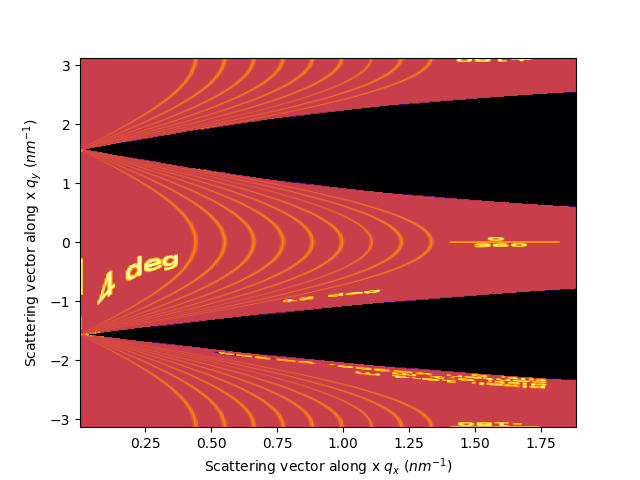

In [22]:
m = IntegrationMethod.select_method(dim=2, split="full", algo="CSR")[0]
print(m)
ai.reset()
res = ai.integrate2d(img, 400,400, method=m, unit=("qx_nm^-1", "qy_nm^-1"))
jupyter.plot2d(res)

In [24]:
ai._cached_array.keys()

dict_keys(['cos_incidence', 'solid_angle#3.0_crc', 'solid_angle#3.0', 'qx_corner'])